# Import Numpy, yFinance, Pandas, Sk-Learn

In [2]:
import yfinance as yf
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Useful functions

In [12]:
def stock_data(ticker, start, end, interval):
    df= yf.Ticker(ticker)
    df = df.history(start=start, end=end, interval=interval)
    df.reset_index(level=0, inplace=True)
    return df
def rolling_average(df,columns, window):
    return df[columns].rolling(window).mean()
def rolling_std(df,columns, window):
    return df[columns].rolling(window).std()

In [13]:
ticker = "PG"
start = "2013-06-01"
end = "2016-12-31"
interval = "1d"

pg = stock_data(ticker, start, end, interval)
pg['mu_20'] = rolling_average(pg,'Close',20)
pg['std_20'] = rolling_std(pg,'Close',20)
pg.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,mu_20,std_20
0,2013-06-03,60.803748,61.460269,60.210502,61.428635,11720600,0.0,0,NaN,NaN
1,2013-06-04,61.468177,62.069334,60.708823,61.199242,11379300,0.0,0,NaN,NaN
2,2013-06-05,60.969870,61.072697,60.613918,60.637653,8826900,0.0,0,NaN,NaN
3,2013-06-06,60.558542,60.882853,59.981119,60.764202,11099900,0.0,0,NaN,NaN
4,2013-06-07,61.254622,61.919054,61.120148,61.499828,7839500,0.0,0,NaN,NaN


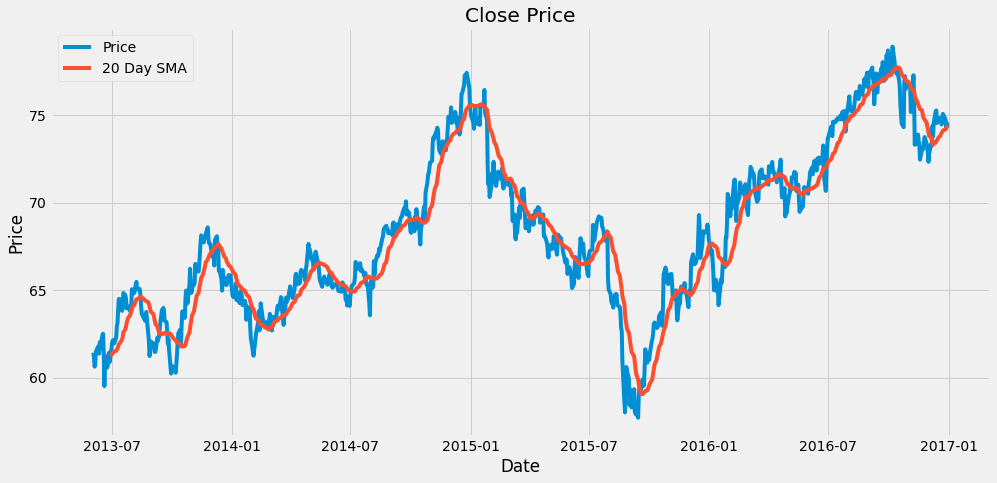

In [16]:
plt.figure(figsize = (15,7))

plt.plot(pg['Date'],pg['Close'],label = "Price")
plt.plot(pg['Date'],pg['mu_20'],label = "20 Day SMA")
plt.title("Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

In [33]:
zScores = [(pg["Close"][day] - pg["mu_20"][day]) / pg["std_20"][day] for day in range(len(pg))]

valuation = 1000
shares = 0
hasPosition = False

netWorth = []
decisions = []

for day in range(len(pg)):
    # Sell short if the z-score is > 1
    if zScores[day] > 1 and hasPosition:
        valuation = shares * pg["Close"][day]
        shares = 0
        decisions.append("Sell")
        hasPosition = False
    # Buy long if the z-score is < 1
    elif zScores[day] < -1 and hasPosition == False:
        shares = valuation / pg["Close"][day]
        decisions.append("Buy")
        hasPosition = True
    # Clear positions if the z-score between -.5 and .5
    elif abs(zScores[day]) < 0.5 and hasPosition:
        valuation = shares*pg["Close"][day]
        shares = 0
        decisions.append("Clear")
        hasPosition = False
    else:
        decisions.append("holding")
    netWorth.append(valuation)
print(netWorth)

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 979.5993523737061, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.2265726357472, 988.22657

In [ ]:
class StockBot:
    watchlist = []
    budget = 0
    portfolio = {}
    
    def __init__(self, watchlist, budget, portfolio = {}):
        self.watchlist = watchlist
        self.budget = budget
        self.portfolio = portfolio
        
    def buy():
        
    def sell():
        
        